# Pandas

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.

https://www.datacamp.com/tutorial/pandas-multi-index


### Numpy:
Data WITHOUT indexes ---> Arrays (1D or many dimensions)

<center> <img src="img/numpy_arrays.png" width="600"/> </center>

### Pandas:
Data WITH indexes ---> Series (1 column), DataFrame (several columns), with MultIndex (different layers)

<center> <img src="img/pandas_df.png" width="700"/> </center>

In [71]:
import numpy as np
import pandas as pd

Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

<center> <img src="img/pandas_series_df.png" width="700"/> </center>

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [10]:
datanp = np.array([0.25, 0.5, 0.75, 1.0])
datanp

array([0.25, 0.5 , 0.75, 1.  ])

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [11]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [12]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [13]:
data[1]

0.5

In [14]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [18]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [21]:
data.iloc[1] # CHECH data[1]

0.5

# loc, iloc

### loc --> access your series/df by index (rows, columns)
### iloc --> access your series/df by position

In [27]:
data.iloc[0]

0.25

In [28]:
data.loc['a']

0.25

In [23]:
data.loc['a']

0.25

In [24]:
data['b']

0.5

We can even use non-contiguous or non-sequential indices:

In [29]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [30]:
data.index

Int64Index([2, 5, 3, 7], dtype='int64')

In [26]:
data[5]

0.5

In [32]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [33]:
population['California']

38332521

In [34]:
population.values

array([38332521, 26448193, 19651127, 19552860, 12882135])

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [31]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects

We've already seen a few ways of constructing a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [18]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [35]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [36]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [37]:
area_dict = {'California': 423967, 'Illinois': 149995, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, }
area = pd.Series(area_dict)
area

California    423967
Illinois      149995
Texas         695662
New York      141297
Florida       170312
dtype: int64

In [38]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [39]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [40]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [41]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### Constructing DataFrame objects

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [42]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [44]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
data = pd.DataFrame(data, index=['aa', 'bb', 'cc'])
data

,a,b
aa,0,0
bb,1,2
cc,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [46]:
df = pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}, {'d':1}])
df

,a,b,c,d
0,1.0,2.0,NaN,NaN
1,NaN,3.0,4.0,NaN
2,NaN,NaN,NaN,1.0


In [52]:
df.loc[:, 'b']

0    2.0
1    3.0
2    NaN
Name: b, dtype: float64

In [62]:
df

,a,b,c
0,1.0,2,6.0
1,NaN,3,4.0


#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [28]:
pd.DataFrame({'population': population,
              'area': area, 'area2': area})

,population,area,area2
California,38332521,423967,423967
Texas,26448193,695662,695662
New York,19651127,141297,141297
Florida,19552860,170312,170312
Illinois,12882135,149995,149995


#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [53]:
data = pd.DataFrame(np.random.rand(3, 2),
                    columns=['foo', 'bar'],
                    index=[1, 2, 5])
data

,foo,bar
1,0.621707,0.483119
2,0.744376,0.726758
5,0.326315,0.923784


In [65]:
np.random.rand(3, 2)

array([[0.84009305, 0.87375535],
       [0.9367475 , 0.03970539],
       [0.60339727, 0.19718966]])

## The Pandas Index Object

We have seen here that both the ``Series`` and ``DataFrame`` objects contain an explicit *index* that lets you reference and modify data.
This ``Index`` object is an interesting structure in itself, and it can be thought of either as an *immutable array* or as an *ordered set* (technically a multi-set, as ``Index`` objects may contain repeated values).
Those views have some interesting consequences in the operations available on ``Index`` objects.
As a simple example, let's construct an ``Index`` from a list of integers:

In [56]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [57]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:


ind[1] = 0

## Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.

loc, iloc, 

First, the ``loc`` attribute allows indexing and slicing that always references the explicit index:

In [58]:
data

,foo,bar
1,0.621707,0.483119
2,0.744376,0.726758
5,0.326315,0.923784


In [59]:
data.loc[1]

foo    0.621707
bar    0.483119
Name: 1, dtype: float64

In [60]:
data.loc[:, 'foo']

1    0.621707
2    0.744376
5    0.326315
Name: foo, dtype: float64

In [62]:
data.iloc[0].loc['foo']

0.6217074918853102

In [63]:
data['bar']

1    0.483119
2    0.726758
5    0.923784
Name: bar, dtype: float64

In [64]:
data.bar

1    0.483119
2    0.726758
5    0.923784
Name: bar, dtype: float64

## col = 'a' (position 2)

## df.a, df['a'], df.loc[:,'a'], df.iloc[:, 2]

In [53]:
data.loc[1:4]

,foo,bar
1,0.968457,0.992146
2,0.812544,0.292530


The iloc attribute allows indexing and slicing that always references the implicit Python-style index:

In [30]:
data.iloc[1]

a    1
b    2
Name: 1, dtype: int64

In [31]:
data.iloc[1:3]

,a,b
1,1,2
2,2,4


## Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

In [125]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [80]:
mask = data.notnull()

In [82]:
mask

0     True
1    False
2     True
3    False
dtype: bool

In [88]:
data2 = pd.Series([2, 3, 98, 187], index=[0, 1, 2, 3])


In [86]:
data2

a      2
b      3
c     98
d    187
dtype: int64

In [89]:
data2[mask]

0     2
2    98
dtype: int64

In [90]:
mask.index

RangeIndex(start=0, stop=4, step=1)

In [55]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [90]:
data[mask]

0        1
2    hello
dtype: object

In [92]:
#pp[~np.isnan(pp)]

In [93]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [100]:
data.dropna(inplace=True) # inplace = True !!!

### NOTE ON .COPY()

In [114]:
data = np.array([1, 2, 3])
data_c = data.copy()

In [110]:
data_c[0] = 4

In [112]:
data_c

array([4, 2, 3])

In [115]:
data

array([1, 2, 3])

### END NOTE

In [60]:
data2 = data.dropna()
data2

0        1
2    hello
dtype: object

In [61]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [62]:
data.dropna(inplace=True)
data

0        1
2    hello
dtype: object

In [126]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      6],
                   [np.nan, 4,      6]], index=['a', 'b', 'c'])
df

,0,1,2
a,1.0,NaN,2
b,2.0,3.0,6
c,NaN,4.0,6


We cannot drop single values from a DataFrame; we can only drop full rows or full columns. Depending on the application, you might want one or the other, so dropna() gives a number of options for a DataFrame.
By default, dropna() will drop all rows in which any null value is present:

In [118]:
df.dropna(axis=1)

,2
a,2
b,6
c,6


In [119]:
df.dropna(axis='columns', how='all')

,0,1,2
a,1.0,NaN,2
b,2.0,3.0,6
c,NaN,4.0,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [120]:
df[3] = np.nan
df

,0,1,2,3
a,1.0,NaN,2,NaN
b,2.0,3.0,6,NaN
c,NaN,4.0,6,NaN


In [121]:
df.dropna(axis='columns', how='all')

,0,1,2
a,1.0,NaN,2
b,2.0,3.0,6
c,NaN,4.0,6


For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [122]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
b,2.0,3.0,6,NaN


We can fill NA entries with a single value, such as zero:


In [123]:
df.fillna(-999)

,0,1,2,3
a,1.0,-999.0,2,-999.0
b,2.0,3.0,6,-999.0
c,-999.0,4.0,6,-999.0


In [133]:
df.loc['d']=np.NaN

In [138]:
df.fillna(method='ffill', limit=2).fillna(897)

,0,1,2,d
a,1.0,897.0,2.0,897.0
b,2.0,3.0,6.0,897.0
c,2.0,4.0,6.0,897.0
d,2.0,4.0,6.0,897.0


In [139]:
df.fillna(method='ffill', axis=1)

,0,1,2,d
a,1.0,1.0,2.0,2.0
b,2.0,3.0,6.0,6.0
c,NaN,4.0,6.0,6.0
d,NaN,NaN,NaN,NaN


## Multi-Index


<center> <img src="img/pandas_df_multindex.png" width="500"/> </center>

In [140]:
import seaborn as sns

In [141]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


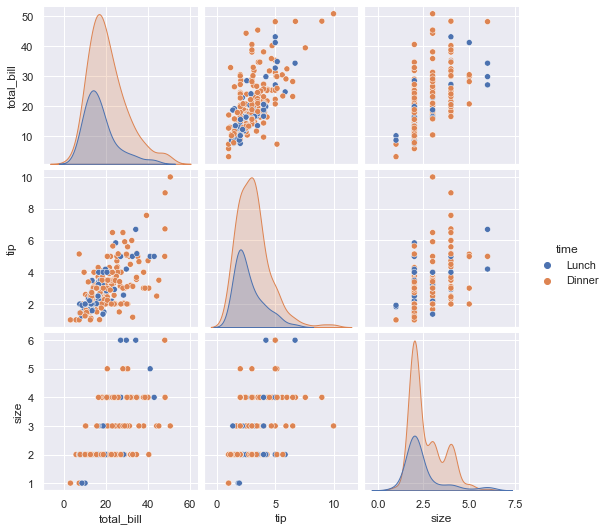

In [143]:
sns.set()
sns.pairplot(tips,hue='time');

In [147]:
# Get mean of smoker/non-smoker groups
df = tips.groupby('smoker').mean()
df

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


In [5]:
df

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


In [148]:
df.reset_index()

,smoker,total_bill,tip,size
0,Yes,20.756344,3.008710,2.408602
1,No,19.188278,2.991854,2.668874


In [153]:
# Group by two columns
df = tips.groupby(['smoker','time']).mean()
df

total_bill       tip      size
smoker time                                  
Yes    Lunch    17.399130  2.834348  2.217391
       Dinner   21.859429  3.066000  2.471429
No     Lunch    17.050889  2.673778  2.511111
       Dinner   20.095660  3.126887  2.735849

In [151]:
# Check out index
df.index

MultiIndex([('Yes',  'Lunch'),
            ('Yes', 'Dinner'),
            ( 'No',  'Lunch'),
            ( 'No', 'Dinner')],
           names=['smoker', 'time'])

In [152]:
tips.groupby(['smoker','time']).size()

smoker  time  
Yes     Lunch      23
        Dinner     70
No      Lunch      45
        Dinner    106
dtype: int64

In [158]:
# Swap levels of multi-index
df.swaplevel()

,,total_bill,tip,size
time,smoker,,,
Lunch,Yes,17.399130,2.834348,2.217391
Dinner,Yes,21.859429,3.066000,2.471429
Lunch,No,17.050889,2.673778,2.511111
Dinner,No,20.095660,3.126887,2.735849


In [156]:
# Unstack your multi-index
df.xs('Lunch', level='time')

,total_bill,tip,size
smoker,,,
Yes,17.399130,2.834348,2.217391
No,17.050889,2.673778,2.511111


In [25]:
df.xs('Yes', level='smoker')

,total_bill,tip,size
time,,,
Lunch,17.399130,2.834348,2.217391
Dinner,21.859429,3.066000,2.471429


In [32]:
df.loc['Yes', :]

,total_bill,tip,size
time,,,
Lunch,17.399130,2.834348,2.217391
Dinner,21.859429,3.066000,2.471429


In [33]:
df.loc['Yes', :].sum()

total_bill    39.258559
tip            5.900348
size           4.688820
dtype: float64

In [31]:
df.loc[('Yes', 'Lunch'), :]

total_bill    17.399130
tip            2.834348
size           2.217391
Name: (Yes, Lunch), dtype: float64

In [15]:
# Unsstack the outer index
df.unstack(level=0)

total_bill                  tip                size          
smoker        Yes         No       Yes        No       Yes        No
time                                                                
Lunch   17.399130  17.050889  2.834348  2.673778  2.217391  2.511111
Dinner  21.859429  20.095660  3.066000  3.126887  2.471429  2.735849

## Merging, concat

In [172]:
df1 = pd.DataFrame(
       {
           "A": ["A0", "A1", "A2", "A3"],
           "B": ["B0", "B1", "B2", "B3"],
           "C": ["C0", "C1", "C2", "C3"],
           "D": ["D0", "D1", "D2", "D3"],
       },
       index=[0, 1, 2, 3],
   )
   
df2 = pd.DataFrame(
        {
            "A": ["A4", "A5", "A6", "A7"],
            "B": ["B4", "B5", "B6", "B7"],
            "C": ["C4", "C5", "C6", "C7"],
            "D": ["D4", "D5", "D6", "D7"],
        },
        index=[0, 1, 2, 3],
    )
    

df3 = pd.DataFrame(
       {
           "A": ["A8", "A9", "A10", "A11"],
           "B": ["B8", "B9", "B10", "B11"],
           "C": ["C8", "C9", "C10", "C11"],
           "D": ["D8", "D9", "D10", "D11"],
       },
       index=[8, 9, 10, 11],
   )
   
frames = [df2,df1,  df3]
result = pd.concat([df2,df1,  df3])

In [160]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [162]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [165]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [169]:
result.sort_index()

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [174]:
pd.concat(frames, keys=["x", "y", "z"]).xs(0, level=1)

,A,B,C,D
x,A4,B4,C4,D4
y,A0,B0,C0,D0


In [188]:
df4 = pd.DataFrame(
      {
          "B": ["B2", "B3", "B6", "B7"],
          "D": ["D2", "D3", "D6", "D7"],
          "F": ["F2", "F3", "F6", "F7"],
      },
      index=[2, 3, 6, 7],
  )
  

result = pd.concat([df1, df4], axis=1, join='inner')

In [182]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [180]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [189]:
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


## Exercise

https://towardsdatascience.com/how-to-use-multiindex-in-pandas-to-level-up-your-analysis-aeac7f451fce

In [190]:
# load data
df = pd.read_csv('data/WordsByCharacter.csv')
# pd.read_csv, PD.READ_TABLE, pd.read_xls()

In [191]:
df

,Film,Chapter,Character,Race,Words
0,The Fellowship Of The Ring,01: Prologue,Bilbo,Hobbit,4
1,The Fellowship Of The Ring,01: Prologue,Elrond,Elf,5
2,The Fellowship Of The Ring,01: Prologue,Galadriel,Elf,460
3,The Fellowship Of The Ring,01: Prologue,Gollum,Gollum,20
4,The Fellowship Of The Ring,02: Concerning Hobbits,Bilbo,Hobbit,214
...,...,...,...,...,...
726,The Return Of The King,76: The Grey Havens,Elrond,Elf,6
727,The Return Of The King,76: The Grey Havens,Frodo,Hobbit,132
728,The Return Of The King,76: The Grey Havens,Galadriel,Elf,17
729,The Return Of The King,76: The Grey Havens,Gandalf,Ainur,42


In [192]:
multi = df.set_index(['Film', 'Chapter', 'Race', 'Character']).sort_index()

In [193]:
multi

Words
Film                       Chapter                                           Race   Character       
The Fellowship Of The Ring 01: Prologue                                      Elf    Elrond         5
                                                                                    Galadriel    460
                                                                             Gollum Gollum        20
                                                                             Hobbit Bilbo          4
                           02: Concerning Hobbits                            Hobbit Bilbo        214
...                                                                                              ...
The Two Towers             65: The Battle For Middle Earth Is About To Begin Hobbit Sam           69
                           66: Gollum's Plan                                 Gollum Gollum        75
                                                                                    Smeagol       53
                                                                             Hobbit Frodo         11
                                                                                    Sam           12

[731 rows x 1 columns]

Which characters speak in the first chapter of “The Fellowship of the Ring”? Find the total number of words per characters' race in the first chapter

Who are the first three elves to speak in the “The Fellowship of the Ring”?


How much do Gandalf and Saruman talk in each chapter of “The Two Towers”?

Which hobbits speak the most in each film and across all three films?

## Extra pandas + seaborn

In [61]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")


In [63]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


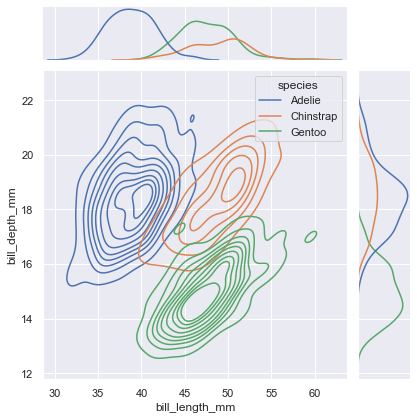

In [65]:
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)

[Text(0, 0.5, '')]

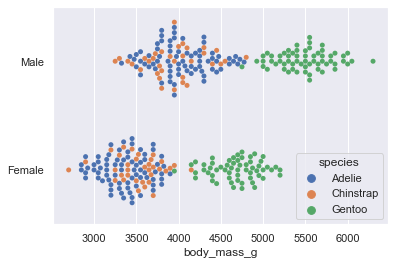

In [68]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=penguins, x="body_mass_g", y="sex", hue="species")
ax.set(ylabel="")

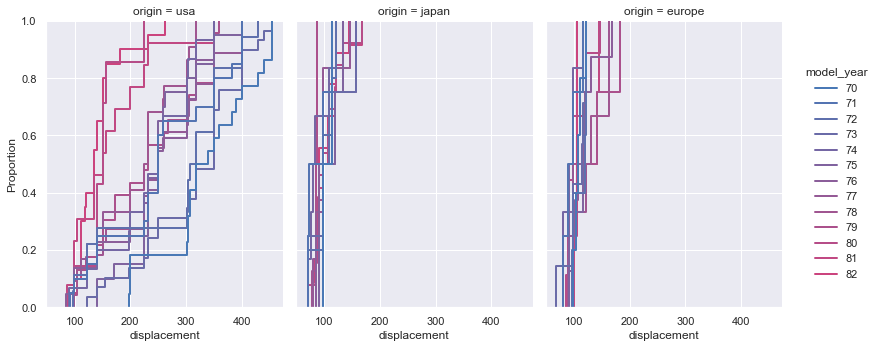

In [70]:
mpg = sns.load_dataset("mpg")

colors = (250, 70, 50), (350, 70, 50)
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)
sns.displot(
    mpg,
    x="displacement", col="origin", hue="model_year",
    kind="ecdf", aspect=.75, linewidth=2, palette=cmap,
)

For the LOTR exercise, plot the number of words per character, per film, per chapter --> how would you present the data?